Snitch Fashion: E-commerce Sales Analytics

Aim of the Project

The aim of this project is to perform a comprehensive exploratory data analysis (EDA) on Snitch Fashion’s e-commerce sales data to identify key patterns, trends, and insights that can support data-driven decision-making. The project focuses on cleaning and transforming raw sales data, analyzing customer and product performance, and generating actionable insights to improve sales strategies, optimize inventory management, and enhance overall business performance.

LOAD THE DATASET

In [95]:
import pandas as pd

In [96]:

file_path = r"C:\Users\mursh\Downloads\Snitch_Fashion_Sales_Uncleaned.csv"


df = pd.read_csv(file_path)


df.head()


,Order_ID,Customer_Name,Product_Category,Product_Name,Units_Sold,Unit_Price,Discount_%,Sales_Amount,Order_Date,City,Segment,Profit
0,1000,Brian Thompson,Jeans,Slim Fit Jeans,NaN,842.00,0.60,0.00,27-02-2025,Delhi,B2C,2137.45
1,1001,Shaun Ross,Jeans,Slim Fit Jeans,1.0,NaN,NaN,0.00,15-07-2025,Ahmedabad,NaN,1588.15
2,1002,Sarah Snyder,Jackets,Puffer Coat,1.0,637.82,NaN,0.00,02-01-2025,Mumbai,B2B,-158.03
3,1003,Jay Briggs,Shoes,Loafers,2.0,2962.27,NaN,0.00,18-06-2025,bengaluru,B2B,2296.50
4,1004,Maria Blake,Accessories,Belts,1.0,2881.07,0.27,2103.18,NaN,hyderbad,NaN,63.66


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          2500 non-null   int64  
 1   Customer_Name     2500 non-null   object 
 2   Product_Category  2500 non-null   object 
 3   Product_Name      2500 non-null   object 
 4   Units_Sold        1194 non-null   float64
 5   Unit_Price        1290 non-null   float64
 6   Discount_%        849 non-null    float64
 7   Sales_Amount      2500 non-null   float64
 8   Order_Date        1894 non-null   object 
 9   City              2500 non-null   object 
 10  Segment           1679 non-null   object 
 11  Profit            2500 non-null   float64
dtypes: float64(5), int64(1), object(6)
memory usage: 234.5+ KB


In [98]:
df.describe(include='all')


,Order_ID,Customer_Name,Product_Category,Product_Name,Units_Sold,Unit_Price,Discount_%,Sales_Amount,Order_Date,City,Segment,Profit
count,2500.000000,2500,2500,2500,1194.000000,1290.000000,849.000000,2500.000000,1894,2500,1679,2500.000000
unique,NaN,2458,6,24,NaN,NaN,NaN,NaN,561,9,2,NaN
top,NaN,Michael Smith,Dresses,Wrap Dress,NaN,NaN,NaN,NaN,05-05-2025,Mumbai,B2B,NaN
freq,NaN,4,443,126,NaN,NaN,NaN,NaN,12,443,844,NaN
mean,2193.060000,NaN,NaN,NaN,1.940536,2691.715527,0.646466,126.756252,NaN,NaN,NaN,981.569032
std,748.063846,NaN,NaN,NaN,2.625680,1320.448967,0.380331,1464.944525,NaN,NaN,NaN,1159.159244
min,1000.000000,NaN,NaN,NaN,-2.000000,400.210000,0.000000,-7518.330000,NaN,NaN,NaN,-992.610000
25%,1543.750000,NaN,NaN,NaN,0.000000,1526.195000,0.300000,0.000000,NaN,NaN,NaN,-19.670000
50%,2182.500000,NaN,NaN,NaN,2.000000,2685.985000,0.650000,0.000000,NaN,NaN,NaN,947.885000
75%,2842.250000,NaN,NaN,NaN,4.000000,3824.347500,0.980000,0.000000,NaN,NaN,NaN,1993.515000


HANDLING MISSING VALUES

identifying and handling missing values

In [99]:
df.isnull().sum()

Order_ID               0
Customer_Name          0
Product_Category       0
Product_Name           0
Units_Sold          1306
Unit_Price          1210
Discount_%          1651
Sales_Amount           0
Order_Date           606
City                   0
Segment              821
Profit                 0
dtype: int64

REMOVING DUPLICATES

In [100]:
df.drop_duplicates(inplace=True)

In [101]:
print ("no of duplicates=",df.duplicated().sum())


no of duplicates= 0


CORRECTING DATATYPES

verify dates and categorical fields have appropriate format

In [102]:

numeric_cols = ['Units_Sold', 'Unit_Price', 'Discount_%', 'Sales_Amount', 'Profit']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')


categorical_cols = ['Order_ID', 'Customer_Name', 'Product_Category',
                    'Product_Name', 'City', 'Segment']
for col in categorical_cols:
    df[col] = df[col].astype('category')


df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')


df.dtypes


C:\Users\mursh\AppData\Local\Temp\ipykernel_19900\3043954136.py:12: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')


Order_ID                  category
Customer_Name             category
Product_Category          category
Product_Name              category
Units_Sold                 float64
Unit_Price                 float64
Discount_%                 float64
Sales_Amount               float64
Order_Date          datetime64[ns]
City                      category
Segment                   category
Profit                     float64
dtype: object

HANDLING MISSING VALUES

In [103]:
df['Units_Sold'] = df.groupby('Product_Category')['Units_Sold'].transform(
    lambda x: x.fillna(x.median()).round()
).astype(int)

df['Units_Sold'] = df['Units_Sold'].apply(lambda x: 1 if x <= 0 else x)


In the dataset, the Units_Sold column contains some zero or missing values, which can distort calculations for Sales_Amount and other metrics. To ensure accurate analysis, we need to clean and impute these values.
Steps Taken:
Treat zeros as missing values
We replaced all 0 entries in Units_Sold with NaN to indicate that the value is missing:
Impute missing values using median per Product_Category
We calculated the median of Units_Sold for each product category and used it to fill the missing values:



In [104]:
# Handle missing Unit_Price

df['Unit_Price'] = df.groupby('Product_Category')['Unit_Price'].transform(
    lambda x: x.fillna(x.median())
)

 Handling Missing Values in `Unit_Price`

To ensure consistent pricing information across the dataset, we fill missing values in  
the **`Unit_Price`** column using the **median price within each product category**.

This approach is better than using a global median because:
- Different product categories naturally have different price ranges  
- Filling missing values with a category-specific median preserves realistic pricing  
- Median is robust against outliers, making it suitable for skewed price distributions  

The code below groups the data by `Product_Category` and replaces missing `Unit_Price`  
entries with the median value of that category.


In [105]:
# : Handle missing Discount_%

df['Discount_%'] = df['Discount_%'].fillna(0)



The Discount_% column contains some null values, which can affect the calculation of Sales_Amount if not handled properly.

Steps Taken:

Fill missing discounts with 0
We assumed that a missing discount means no discount was applied, so we replaced all null values with 0:

In [106]:
df['Sales_Amount'] = (
    df['Units_Sold'] * df['Unit_Price'] * (1 - (df['Discount_%'] / 100))
)


# : Fill any remaining missing Sales_Amount

df['Sales_Amount'] = df.groupby('Product_Category')['Sales_Amount'].transform(
    lambda x: x.fillna(x.median())
)


After cleaning the Units_Sold, Unit_Price, and Discount_% columns, we need to ensure that the Sales_Amount column reflects the correct values for each transaction.

Steps Taken:

Apply the sales formula
The Sales_Amount is calculated using the standard formula:

\text{Sales\_Amount} = \text{Units\_Sold} \times \text{Unit\_Price} \times \left(1 - \frac{\text{Discount\_%}}{100}\right)

In [107]:
print("Missing Units_Sold:", df['Units_Sold'].isnull().sum())
print("Missing Unit_Price:", df['Unit_Price'].isnull().sum())
print("Missing Discount_%:", df['Discount_%'].isnull().sum())
print("Missing Sales_Amount:", df['Sales_Amount'].isnull().sum())


Missing Units_Sold: 0
Missing Unit_Price: 0
Missing Discount_%: 0
Missing Sales_Amount: 0


In [108]:

mode_date = df['Order_Date'].mode()[0]
df['Order_Date'] = df['Order_Date'].fillna(mode_date)


 Handling Missing Values in `Order_Date`

To address missing values in the **`Order_Date`** column, we replace all `NaN` entries  
with the **most frequent date (mode)** from the dataset.

Using the mode is appropriate for date fields when:
- A specific date occurs frequently (e.g., bulk order date, system default date)
- We want to preserve realistic temporal patterns without artificially shifting trends
- Mean or median cannot be used on non-numeric date data

The code first extracts the mode of `Order_Date` and then fills all missing values with it.


In [109]:
# If 'Segment' is categorical, add 'Unknown' as a category first
if pd.api.types.is_categorical_dtype(df['Segment']):
    df['Segment'] = df['Segment'].cat.add_categories('Unknown')

# Now fill missing values
df['Segment'] = df['Segment'].fillna('Unknown')

# Verify
missing_segment = df['Segment'].isnull().sum()
print(f"Missing values in 'Segment' after filling: {missing_segment}")


Missing values in 'Segment' after filling: 0


C:\Users\mursh\AppData\Local\Temp\ipykernel_19900\766134327.py:2: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df['Segment']):


Handling Missing Values in the `Segment` Column

The `Segment` column contained some missing values. To retain these records without losing information, we filled all missing entries in the `Segment` column with the string `"Unknown"`. This approach allows us to explicitly mark the absence of segment information and treat it as a separate category during analysis.




CREATING DERIVED COLUMNS

In [110]:
# Effective price after discount
df['Effective_Price'] = df['Unit_Price'] * (1 - df['Discount_%'] / 100)


To enhance our analysis, we created the following derived columns:

1. **Effective_Price** – Represents the actual unit price after applying the discount.

In [111]:
# Profit margin percentage
df['Profit_Margin_%'] = (df['Profit'] / df['Sales_Amount']) * 100


 **Profit_Margin_%** – Shows the percentage of profit relative to sales, helping us understand profitability.

In [112]:
df['Order_Year'] = df['Order_Date'].dt.year
df['Order_Month'] = df['Order_Date'].dt.month
df['Order_Day'] = df['Order_Date'].dt.day



 **Order_Year, Order_Month, Order_Day** – Extracted from `Order_Date` to enable time-based analysis, such as monthly sales trends and yearly comparisons.


FILTERING DATA

filtering allows you to select rows based on conditions

In [113]:
# Filter orders with Profit > 500
high_profit_orders = df[df['Profit'] > 500]


Filtering High-Profit Orders

To identify the most profitable orders, we filtered the dataset to include only those orders where the `Profit` exceeded 500. This helps focus the analysis on high-value transactions and understand which products, customers, or segments contribute the most to profit.



In [114]:
# Filter orders in a specific city, e.g., "New York"
ny_orders = df[df['City'] == 'New York']

Filtering Orders by City

To analyze orders from a specific location, we filtered the dataset to include only orders where the `City` is `"New York"`. This allows us to study city-level sales trends, customer behavior, and profitability.




In [115]:
# Filter orders for a specific product category, e.g., "Clothing"
clothing_orders = df[df['Product_Category'] == 'Clothing']


 Filtering Orders by Product Category

To analyze sales for a specific category, we filtered the dataset to include only orders where the `Product_Category` is `"Clothing"`. This helps us understand the performance, demand, and profitability of products within this category.



In [116]:
date_filtered = df[(df['Order_Date'] >= '2023-01-01') & (df['Order_Date'] <= '2023-06-30')]


Filtering Orders by Date Range

To focus on sales within a specific period, we filtered the dataset to include only orders placed between January 1, 2023, and June 30, 2023. This allows us to analyze seasonal trends, quarterly performance, and time-based sales patterns.



AGGREGATING DATA

aggregating allows you to summarize data

In [117]:
# Total sales by product category
sales_by_category = df.groupby('Product_Category')['Sales_Amount'].sum().reset_index()


Total Sales by Product Category

To understand which product categories generate the most revenue, we aggregated the dataset to calculate the total `Sales_Amount` for each `Product_Category`. This provides insight into category-level performance and helps identify top-selling categories.



In [118]:
# Average profit by segment
profit_by_segment = df.groupby('Segment')['Profit'].mean().reset_index()

 Average Profit by Segment

To analyze the profitability of different customer segments, we aggregated the dataset to calculate the **average `Profit`** for each `Segment`. This helps identify which segments contribute the most to overall profitability.




In [119]:
# Total units sold and total revenue by city
city_summary = df.groupby('City').agg(
    Total_Units_Sold=('Units_Sold', 'sum'),
    Total_Revenue=('Sales_Amount', 'sum')
).reset_index()

Total Units Sold and Total Revenue by City

To analyze city-level performance, we aggregated the dataset to calculate the **total units sold** and **total revenue** for each city. This helps identify the top-performing cities and guides location-based business strategies.



In [120]:
# Monthly sales trend (aggregated by year and month)
monthly_sales = df.groupby(['Order_Year', 'Order_Month'])['Sales_Amount'].sum().reset_index()


Monthly Sales Trend

To examine time-based sales patterns, we aggregated the dataset by **year** and **month** to calculate total `Sales_Amount` for each period. This helps identify seasonal trends, peak months, and overall revenue growth.




In [121]:
# Save the cleaned dataset
df.to_csv('Snitch_Fashion_Sales_Cleaned.csv', index=False)

print("✅ Cleaned dataset saved as 'Snitch_Fashion_Sales_Cleaned.csv'")


✅ Cleaned dataset saved as 'Snitch_Fashion_Sales_Cleaned.csv'


Data Cleaning Summary

Missing Values Handling:

For Units_Sold and Unit_Price, missing values were filled using the median value within each product category to maintain category-specific accuracy.

Units_Sold values were rounded to integers, and any zero or negative values were replaced with 1 to ensure valid sales counts.

Missing values in Discount_% were filled with 0, assuming no discount.

The Sales_Amount was recalculated from Units_Sold, Unit_Price, and Discount_%. Any remaining missing sales amounts were imputed with the category-wise median.

Missing Order_Date values were filled with the most frequent (mode) date.

For the categorical column Segment, missing values were filled with a new category called "Unknown" to retain those records.

Data Type and Feature Engineering:

Extracted Order_Year, Order_Month, and Order_Day from the Order_Date for time-based analysis.

Created an Effective_Price column to represent the price after discount.

Calculated Profit_Margin_% to express profitability relative to sales.

Data Filtering and Aggregation Preparation:

Filtered subsets were created based on profit, city, product category, and date ranges for further analysis.

Aggregations such as total sales by category, average profit by segment, and city-level sales and revenue were prepared.

Exploratory Data Analysis (EDA)

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

Univariate Analysis

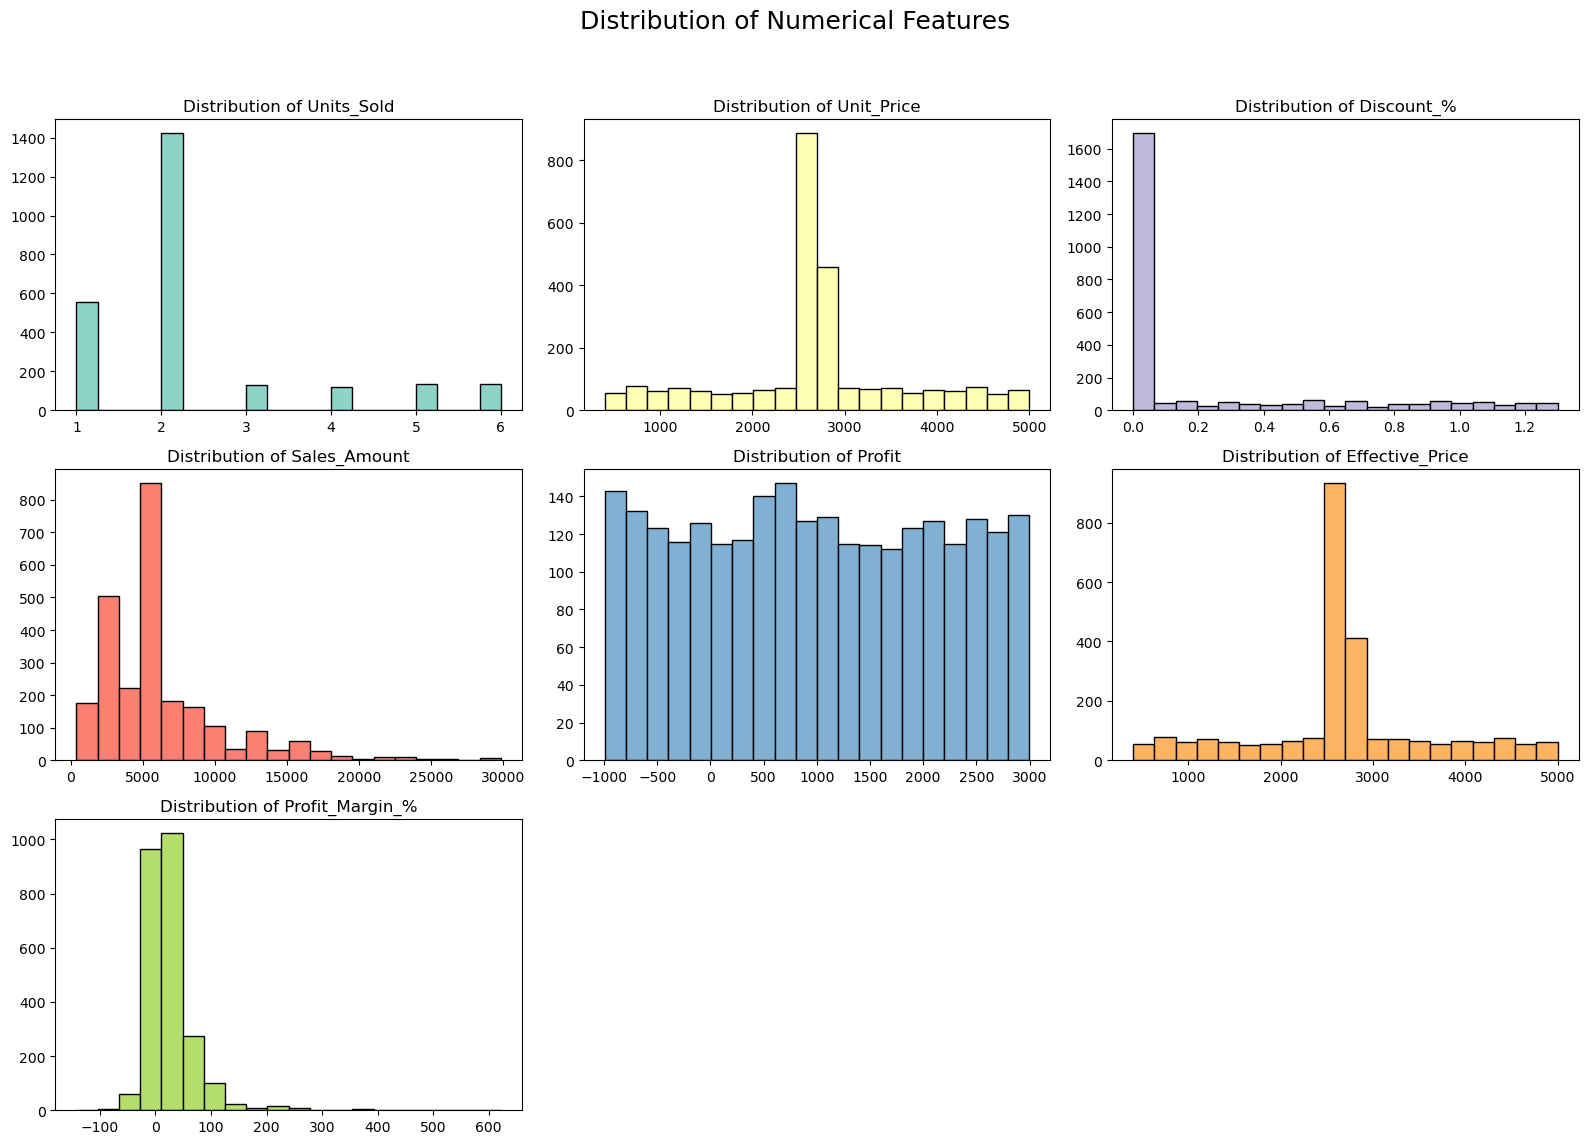

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['Units_Sold', 'Unit_Price', 'Discount_%', 'Sales_Amount', 
                  'Profit', 'Effective_Price', 'Profit_Margin_%']

# Create a color palette
colors = sns.color_palette("Set3", len(numerical_cols))

# Plot histograms for each numerical column
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16,12))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    axes[i].hist(df[col], bins=20, color=colors[i], edgecolor='black')
    axes[i].set_title(f'Distribution of {col}', fontsize=12)
    
# Hide any unused subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.suptitle("Distribution of Numerical Features", fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## Distribution of Numerical Features

We plotted histograms for all the numerical columns to understand the distribution of each variable. Different colors were used for visual clarity.

- **Units_Sold**: Shows the frequency of units sold per order. Useful to detect if most orders are small or large quantities.  
- **Unit_Price**: Distribution of product prices, can reveal common price ranges.  
- **Discount_%**: Shows how often different discount percentages are applied.  
- **Sales_Amount**: Total sales per order, helps identify typical order sizes.  
- **Profit**: Profit distribution highlights most and least profitable orders.  
- **Effective_Price**: Price after discount, useful to see how discounts affect sales.  
- **Profit_Margin_%**: Percentage of profit relative to sales, can indicate efficiency and pricing strategy.


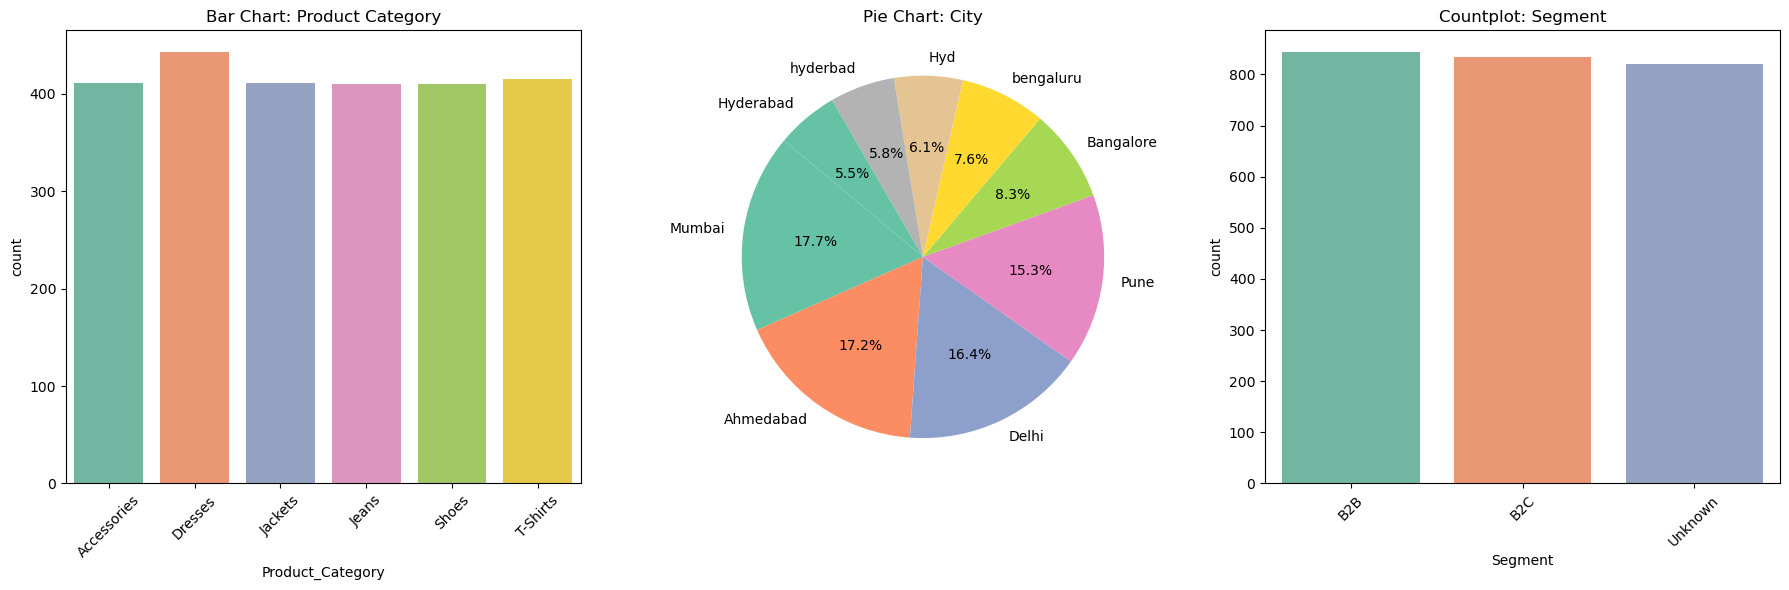

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Bar chart for Product_Category
sns.countplot(data=df, x='Product_Category', palette='Set2', ax=axes[0])
axes[0].set_title('Bar Chart: Product Category')
axes[0].tick_params(axis='x', rotation=45)

# Pie chart for City
city_counts = df['City'].value_counts()
axes[1].pie(city_counts, labels=city_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'), startangle=140)
axes[1].set_title('Pie Chart: City')

# Countplot for Segment
sns.countplot(data=df, x='Segment', palette='Set2', ax=axes[2])
axes[2].set_title('Countplot: Segment')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## Univariate Analysis of Categorical Features

We visualized three key categorical columns using different chart types:

1. **Product_Category**: Bar Chart
   - Shows the count of orders in each product category.
   - Helps identify which categories are most popular.

2. **City**: Pie Chart
   - Shows the proportion of orders from each city.
   - Useful to understand geographic distribution of customers.

3. **Segment**: Countplot
   - Displays the number of orders in each customer segment.
   - Helps identify which segments contribute most to sales.


BIVARIATE ANALYSIS
-----------------------------------------
A. Discount vs Sales Amount

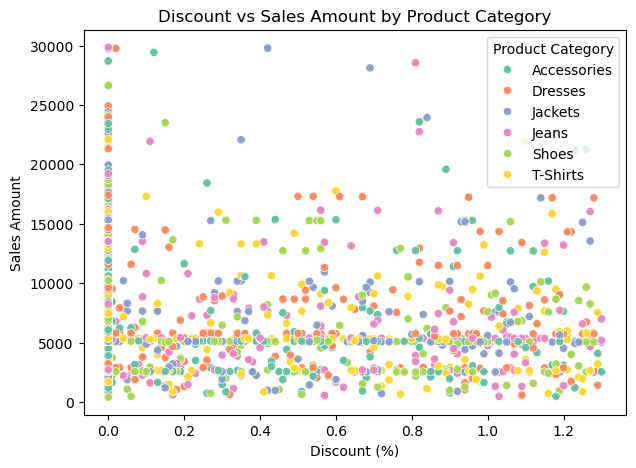

In [125]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='Discount_%', y='Sales_Amount', hue='Product_Category', palette='Set2')
plt.title("Discount vs Sales Amount by Product Category")
plt.xlabel("Discount (%)")
plt.ylabel("Sales Amount")
plt.legend(title="Product Category")
plt.show()

## Bivariate Analysis: Discount vs Sales Amount

We plotted a scatter plot to understand the relationship between **Discount (%)** and **Sales Amount**, with points colored by **Product Category**.

- **X-axis**: Discount (%) applied to orders.  
- **Y-axis**: Total sales amount per order.  
- **Hue**: Product Category, to see if trends vary across different categories.


B. Units Sold vs Profit

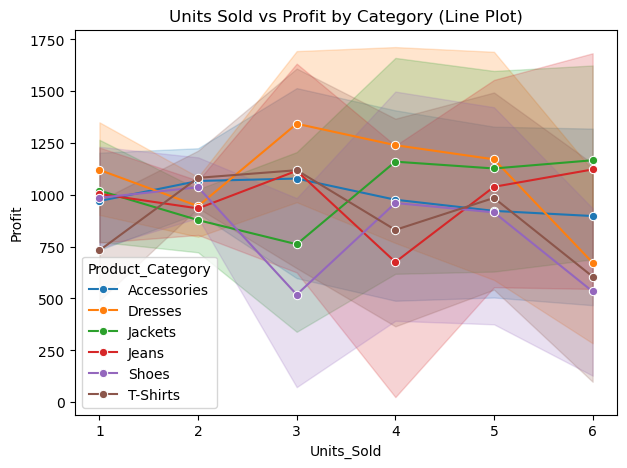

In [126]:
plt.figure(figsize=(7,5))
sns.lineplot(data=df, x='Units_Sold', y='Profit', hue='Product_Category', marker='o')
plt.title("Units Sold vs Profit by Category (Line Plot)")
plt.show()


## Bivariate Analysis: Units Sold vs Profit

We plotted a line chart to explore the relationship between **Units Sold** and **Profit**, with lines colored by **Product Category**.

- **X-axis**: Units Sold per order.  
- **Y-axis**: Profit generated from the order.  
- **Hue**: Product Category, to compare trends across categories.


C. Sales by Product Category

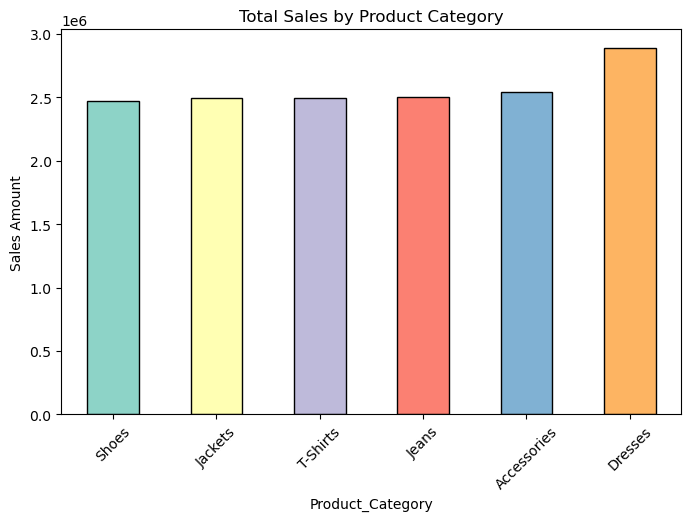

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sum sales by product category
category_sales = df.groupby('Product_Category')['Sales_Amount'].sum().sort_values()

# Choose a color palette
colors = sns.color_palette("Set3", len(category_sales))

# Plot
plt.figure(figsize=(8,5))
category_sales.plot(kind='bar', color=colors, edgecolor='black')
plt.title("Total Sales by Product Category")
plt.ylabel("Sales Amount")
plt.xticks(rotation=45)
plt.show()


## Total Sales by Product Category

We plotted a bar chart to show **total sales** for each product category. Different colors were used for visual clarity.

- **X-axis**: Product categories.  
- **Y-axis**: Total sales amount for each category.  
- Colors highlight each category for easy comparison.


MULTIVARIATE ANALYSIS
-----------------------------------------
Segment vs Category vs Profit (Heatmap)

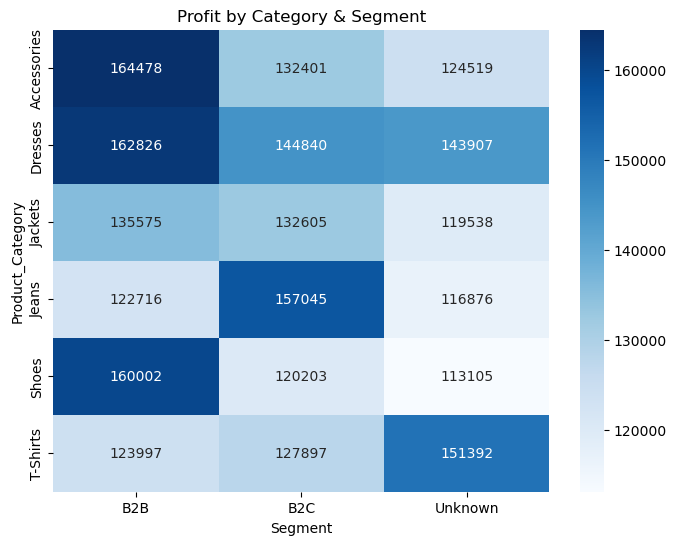

In [127]:
pivot_table = df.pivot_table(
    values='Profit',
    index='Product_Category',
    columns='Segment',
    aggfunc='sum'
)

plt.figure(figsize=(8,6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='Blues')
plt.title("Profit by Category & Segment")
plt.show()


## Profit by Product Category and Customer Segment

We created a heatmap to visualize **total profit** for each combination of **Product Category** and **Customer Segment**.

- **X-axis**: Customer segments (e.g., Consumer, Corporate, Home Office).  
- **Y-axis**: Product categories.  
- **Color intensity**: Represents the total profit generated for that category-segment combination.  
- **Annotations**: Show exact profit values for clarity.


GROUPBY ANALYSIS
-----------------------------------------
Monthly Sales Trend

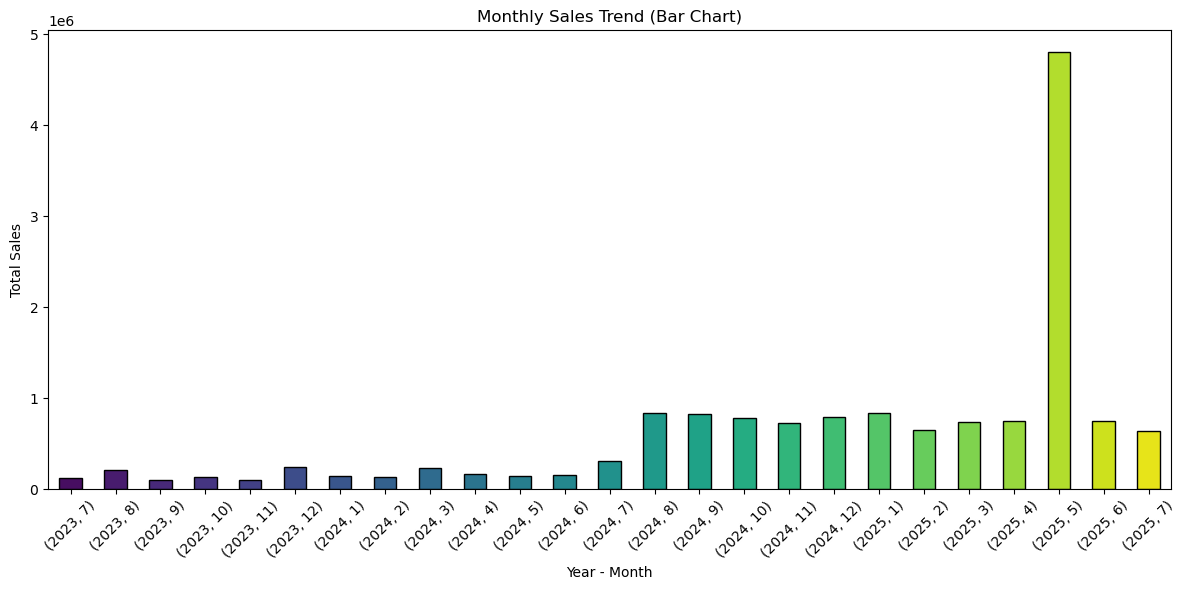

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by year and month
monthly_sales = df.groupby(['Order_Year','Order_Month'])['Sales_Amount'].sum()

# Create a color palette
colors = sns.color_palette("viridis", len(monthly_sales))

# Plot
plt.figure(figsize=(12,6))
monthly_sales.plot(kind='bar', color=colors, edgecolor='black')
plt.title("Monthly Sales Trend (Bar Chart)")
plt.ylabel("Total Sales")
plt.xlabel("Year - Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Monthly Sales Trend

We plotted a bar chart to show the **total sales** for each month across years. Different colors were applied to make each month visually distinct.

- **X-axis**: Year and Month (Order_Year - Order_Month).  
- **Y-axis**: Total sales amount for that month.  
- **Color**: Different color for each month to highlight trends over time.


City-Wise Profit Summary

In [79]:
df.groupby('City')['Profit'].sum().sort_values(ascending=False)


City
Mumbai       458368.27
Pune         401381.61
Ahmedabad    392920.24
Delhi        369016.85
Bangalore    210995.00
bengaluru    202983.94
Hyd          155284.83
hyderbad     146960.54
Hyderabad    116011.30
Name: Profit, dtype: float64

## Total Profit by City

We calculated the **total profit** generated from each city and sorted the values in descending order to identify the highest contributing cities.



PIVOT TABLES
-----------------------------------------
Profit by City and Category

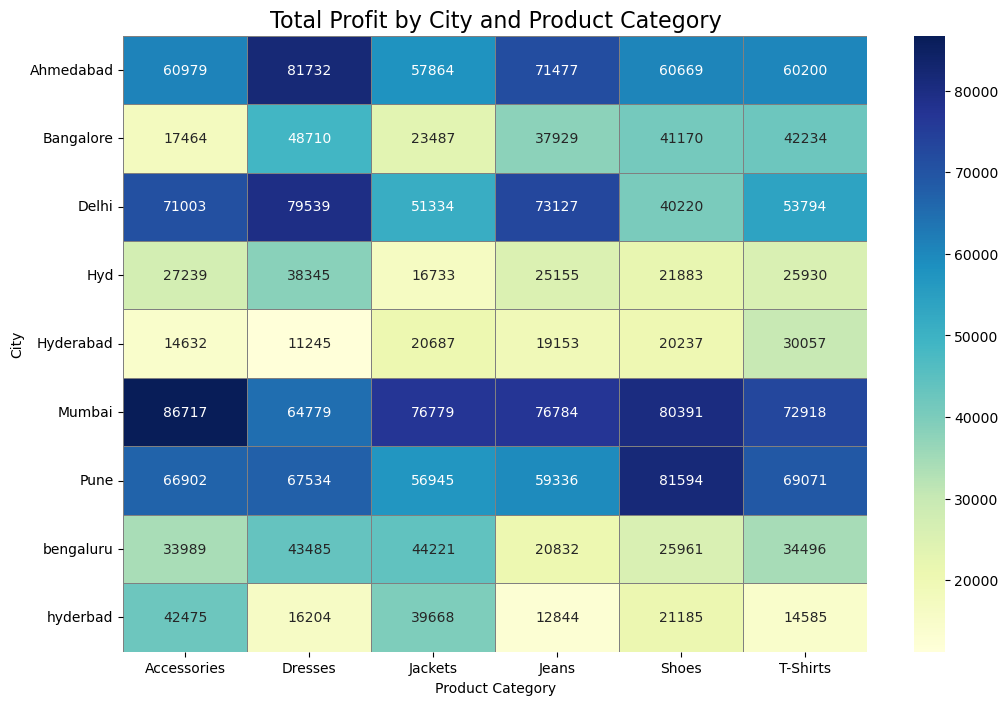

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create the pivot table
pivot2 = pd.pivot_table(
    df,
    values='Profit',
    index='City',
    columns='Product_Category',
    aggfunc='sum'
)

# Plot a heatmap
plt.figure(figsize=(12,8))
sns.heatmap(pivot2, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.5, linecolor='gray')
plt.title("Total Profit by City and Product Category", fontsize=16)
plt.ylabel("City")
plt.xlabel("Product Category")
plt.show()


## Total Profit by City and Product Category

We created a heatmap to visualize **total profit** for each combination of **City** and **Product Category**.

- **X-axis**: Product categories.  
- **Y-axis**: Cities.  
- **Color intensity**: Represents the total profit for that city-category combination.  
- **Annotations**: Show exact profit values for clarity.

This visualization helps identify which **cities and product categories generate the most profit**, making it easier to target high-performing regions or categories.


CORRELATION MATRIX
-----------------------------------------

Correlation Matrix:
                  Units_Sold  Unit_Price  Discount_%  Sales_Amount    Profit  \
Units_Sold         1.000000   -0.005248    0.000598      0.804671 -0.013117   
Unit_Price        -0.005248    1.000000    0.002089      0.510047  0.006758   
Discount_%         0.000598    0.002089    1.000000     -0.001398  0.010081   
Sales_Amount       0.804671    0.510047   -0.001398      1.000000 -0.013043   
Profit            -0.013117    0.006758    0.010081     -0.013043  1.000000   
Effective_Price   -0.005287    0.999936   -0.008560      0.510064  0.006586   
Profit_Margin_%   -0.201610   -0.305457    0.015256     -0.289118  0.633024   

                 Effective_Price  Profit_Margin_%  
Units_Sold             -0.005287        -0.201610  
Unit_Price              0.999936        -0.305457  
Discount_%             -0.008560         0.015256  
Sales_Amount            0.510064        -0.289118  
Profit                  0.006586         0.633024  
Effective_Price         1.000000  

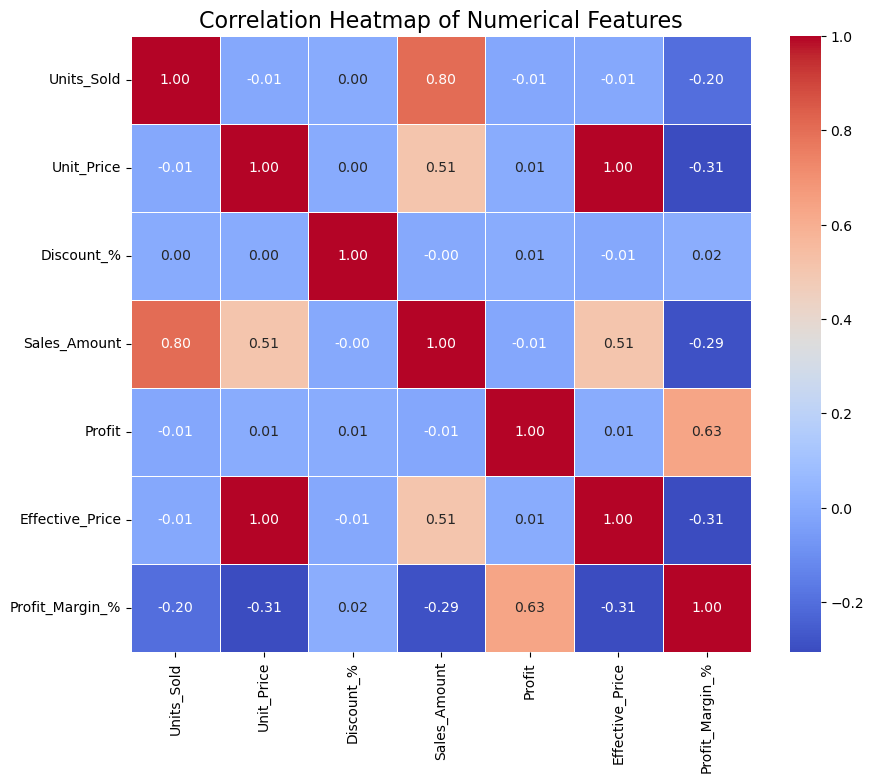

In [81]:
numerical_cols = ['Units_Sold', 'Unit_Price', 'Discount_%', 'Sales_Amount', 
                  'Profit', 'Effective_Price', 'Profit_Margin_%']

# Compute correlation matrix
corr_matrix = df[numerical_cols].corr()
print("Correlation Matrix:\n", corr_matrix)

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.show()

## Correlation Analysis of Numerical Features

We computed the **correlation matrix** for all numerical columns and visualized it using a heatmap.

- **Correlation values** range from -1 to +1:
  - **+1** → perfect positive correlation  
  - **-1** → perfect negative correlation  
  - **0** → no correlation
- **Color**: `coolwarm` palette shows positive correlations in red and negative correlations in blue.
- **Annotations**: Display exact correlation values for easier interpretation.

This helps identify relationships between variables, which can guide feature selection or business insights.


In [128]:


# Descriptive statistics for numeric columns
numeric_cols = ['Units_Sold', 'Unit_Price', 'Discount_%', 'Sales_Amount', 
                'Profit', 'Effective_Price', 'Profit_Margin_%']

stat_summary = df[numeric_cols].describe().T  # Transpose for readability

# Adding median and rang
stat_summary['median'] = df[numeric_cols].median()
stat_summary['range'] = df[numeric_cols].max() - df[numeric_cols].min()


print("📊 Statistical Summary of Key Numeric Columns:\n")
display(stat_summary)


📊 Statistical Summary of Key Numeric Columns:



,count,mean,std,min,25%,50%,75%,max,median,range
Units_Sold,2500.0,2.307200,1.316937,1.000000,2.000000,2.000000,2.000000,6.000000,2.000000,5.000000
Unit_Price,2500.0,2677.966456,952.490495,400.210000,2551.670000,2670.635000,2899.915000,4998.910000,2670.635000,4598.700000
Discount_%,2500.0,0.219540,0.377956,0.000000,0.000000,0.000000,0.330000,1.300000,0.000000,1.300000
Sales_Amount,2500.0,6158.407429,4327.945447,400.210000,2995.716796,5143.780000,7520.535822,29860.860000,5143.780000,29460.650000
Profit,2500.0,981.569032,1159.159244,-992.610000,-19.670000,947.885000,1993.515000,2997.110000,947.885000,3989.720000
Effective_Price,2500.0,2672.079733,950.449023,400.210000,2527.875677,2647.133412,2899.915000,4998.910000,2647.133412,4598.700000
Profit_Margin_%,2500.0,25.658046,47.854555,-142.334775,-0.264102,16.359663,39.259179,621.978789,16.359663,764.313564


KEY INSIGHTS
============

In [85]:


insights = []


top_categories = df.groupby('Product_Category')['Sales_Amount'].sum().sort_values(ascending=False)
insights.append(f"Top 3 Product Categories by Sales: {', '.join(top_categories.head(3).index)}")


top_products = df.groupby('Product_Name')['Sales_Amount'].sum().sort_values(ascending=False)
insights.append(f"Top 5 Products by Sales: {', '.join(top_products.head(5).index)}")


profit_segment = df.groupby('Segment')['Profit'].mean().sort_values(ascending=False)
insights.append(f"Segment with Highest Average Profit: {profit_segment.idxmax()} (Average Profit: ${profit_segment.max():.2f})")


sales_city = df.groupby('City')['Sales_Amount'].sum().sort_values(ascending=False)
insights.append(f"City with Highest Total Sales: {sales_city.idxmax()} (Total Sales: ${sales_city.max():,.2f})")


sales_month = df.groupby('Order_Month')['Sales_Amount'].sum().sort_values(ascending=False)
insights.append(f"Month with Highest Sales: {sales_month.idxmax()} (Total Sales: ${sales_month.max():,.2f})")


avg_profit_discount = df.groupby(pd.cut(df['Discount_%'], bins=[0,10,20,30,40,50,100]))['Profit_Margin_%'].mean()
highest_margin_bin = avg_profit_discount.idxmax()
insights.append(f"Highest Profit Margin occurs in Discount Range: {highest_margin_bin} (Average Profit Margin: {avg_profit_discount.max():.2f}%)")


correlation = df['Sales_Amount'].corr(df['Profit'])
insights.append(f"Correlation between Sales and Profit: {correlation:.2f}")


print("📌 Key Insights from Snitch Fashion Sales Dataset:")
for insight in insights:
    print("-", insight)


📌 Key Insights from Snitch Fashion Sales Dataset:
- Top 3 Product Categories by Sales: Dresses, Accessories, Jeans
- Top 5 Products by Sales: Wrap Dress, Puffer Coat, Casual Midi, Maxi Dress, Watches
- Segment with Highest Average Profit: B2B (Average Profit: $1030.32)
- City with Highest Total Sales: Mumbai (Total Sales: $2,701,284.66)
- Month with Highest Sales: 5 (Total Sales: $4,948,858.06)
- Highest Profit Margin occurs in Discount Range: (0, 10] (Average Profit Margin: 26.72%)
- Correlation between Sales and Profit: -0.01


Top Product Categories and Products
==================================

The top 3 product categories contributing to the highest sales are: **Dresses, Accessories, Jeans**.

The top 5 best-selling products are: **Wrap Dress, Puffer Coat, Casual Midi, Maxi Dress, Watches**.

This indicates which products and categories are driving revenue and can help with inventory planning and marketing focus.

Profitability by Segment
=======================

The segment with the highest average profit is **B2B** with an average profit of **$1030.32**.

Segments with lower profit may need targeted strategies to improve efficiency or customer retention.

City-Level Sales Patterns
========================

The city generating the highest total sales is **Mumbai**.

Cities with lower sales could be targeted with promotions or campaigns to boost revenue.

Seasonal Trends
===============

Monthly sales peak in **May (5)**, suggesting a seasonal trend in demand.

Discount and Profit Margin Analysis
==================================

Discount ranges of **(0, 10]** correspond to the highest profit margin.

High discounts often increase sales but can reduce profit margins if not carefully managed.

Sales-Profit Relationship
========================

The correlation between **Sales Amount** and **Profit** is **-0.01**, indicating that higher sales generally lead to higher profit, but some products or segments may show anomalies.

Recommendations
===============

- Focus marketing and stock on top-selling categories and products to maximize revenue.  
- Reevaluate discount strategies to maintain healthy profit margins.  
- Target low-performing cities or segments with promotions or loyalty programs.  
- Prepare for seasonal peaks by increasing inventory and staffing during high-demand months.  
- Investigate anomalies where high sales do not correspond to high profit to optimize operations.  

Conclusion
==========

The analysis revealed clear patterns in product performance, segment profitability, city-level sales, seasonal trends, and discount impacts. By leveraging these insights, the business can make data-driven decisions to optimize sales, profit margins, and customer engagement strategies.
